In [1]:
import geopandas as gpd

data = gpd.read_file("../resources/NaturalEarth/10m_cultural/ne_10m_time_zones.shp")
countries = gpd.read_file("../resources/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
data = data.sort_values('name')

print(data.columns)


Index(['objectid', 'scalerank', 'featurecla', 'name', 'map_color6',
       'map_color8', 'note', 'zone', 'utc_format', 'time_zone', 'iso_8601',
       'places', 'dst_places', 'tz_name1st', 'tz_namesum', 'geometry'],
      dtype='object')


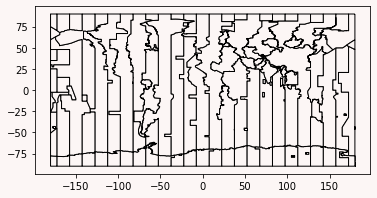

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
ax.set_facecolor('#FCF6F5FF')
data.plot(ax=ax, color='#FCF6F5FF', edgecolor='black', lw=1)
plt.show()

### Exercise

- Reproject the data map.
- Find a colourmap that highlights the different timezones clearly.
- Plot the worlds borders on top to show how timezones match with country outlines.

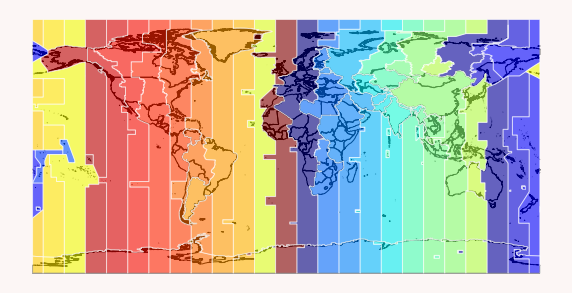

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))

countries.plot(ax=ax, color='none', edgecolor='black', lw=1)
data.plot(ax=ax, column='name', cmap='jet', edgecolor='white', lw=1, alpha=0.6)
ax.axis('off')
plt.savefig("../resources/assets/timezones.png", dpi=600, bbox_inches='tight')
plt.show()

In [5]:

import pandas as pd
uk = data.loc[data['name'] == 0]
texas = data.loc[data['name'] == -6]
my_flight = pd.concat([uk, texas])

In [6]:
airports = pd.read_csv("../resources/airports", delimiter=',', names=['id', 'name', 'city', 'country', 'iata', 
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

In [7]:
routes = pd.read_csv("../resources/routes", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [8]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(airports['long'], airports['lat'])]
airports = gpd.GeoDataFrame(airports, crs="EPSG:4326", geometry=geometry)

In [9]:
new_airports = gpd.sjoin(airports, my_flight, op='within')

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [10]:
print(new_airports.name_right.unique())

[]


In [11]:
from shapely.geometry import LineString

source_airports = new_airports[['name_left', 'iata', 'icao', 'lat', 'long', 'name_right']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')


In [12]:
routes = routes[routes['name_right_source'] != routes['name_right_destination']]

routes_geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes_geodata = gpd.GeoDataFrame(routes, geometry=routes_geometry, crs='EPSG:4326')

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


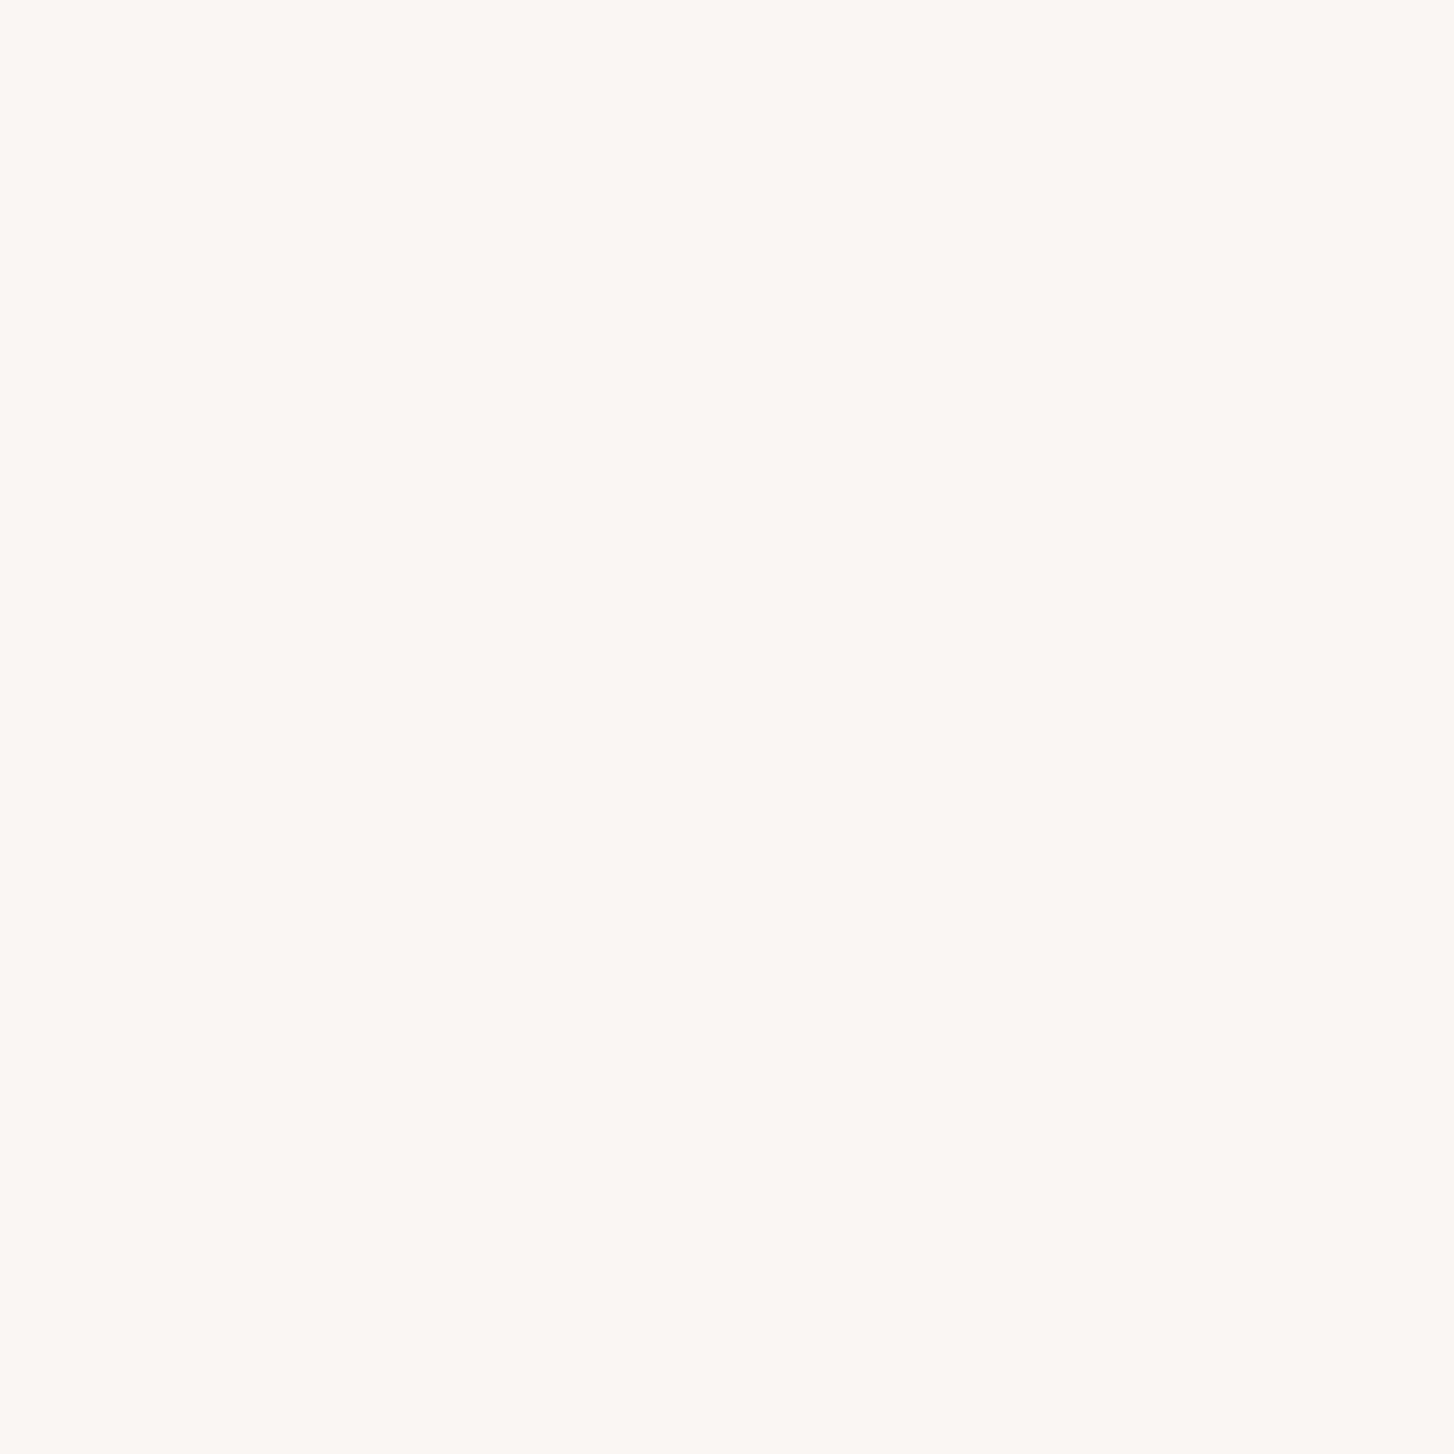

In [13]:
fig = plt.figure(facecolor='#FCF6F5FF', figsize=(20,20))
ax = plt.axes()

ax.patch.set_facecolor('#FCF6F5FF')

routes_geodata.plot(ax=ax, color='black', linewidth=0.1)

plt.setp(ax.spines.values(), color='#FCF6F5FF')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#FCF6F5FF')
ax.axis('off')
plt.show()

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))

countries.plot(ax=ax, color='none', edgecolor='black', lw=1)
data.plot(ax=ax, column='name', cmap='jet', edgecolor='white', lw=1, alpha=0.6)
routes_geodata.plot(ax=ax, color='black', linewidth=0.1)

ax.axis('off')
plt.show()

C:\Users\AdamS\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 720x720 with 1 Axes>